In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv("/content/winequality-red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
data.shape

(1599, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [12]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

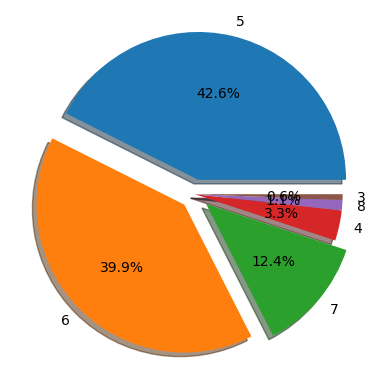

In [13]:
plt.pie(data['quality'].value_counts(),labels=['5','6','7','4','8','3'],autopct='%0.1f%%',shadow=True,explode=[0.1,0.1,0.1,0,0,0])
plt.show()

#Outlier replacement

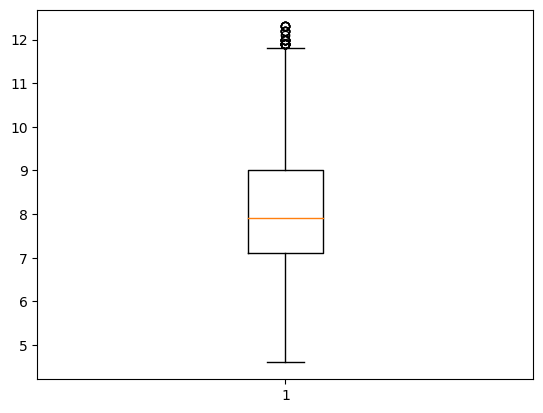

In [14]:
q3 = data['fixed acidity'].quantile(0.75)
q1 = data['fixed acidity'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['fixed acidity'] = np.where(data['fixed acidity'] > r,7.9,data['fixed acidity'])
plt.boxplot(data['fixed acidity'])
plt.show()

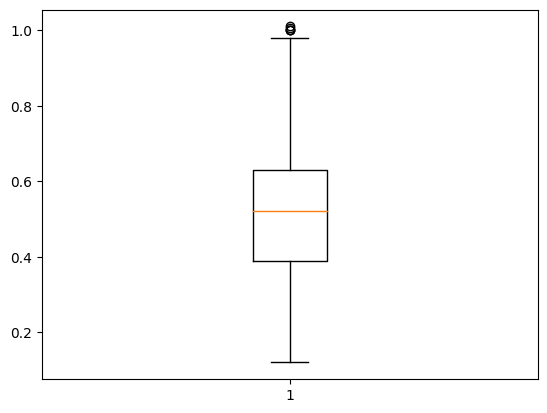

In [15]:
q3 = data['volatile acidity'].quantile(0.75)
q1 = data['volatile acidity'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['volatile acidity'] = np.where(data['volatile acidity'] > r,data['volatile acidity'].median(),data['volatile acidity'])
plt.boxplot(data['volatile acidity'])
plt.show()

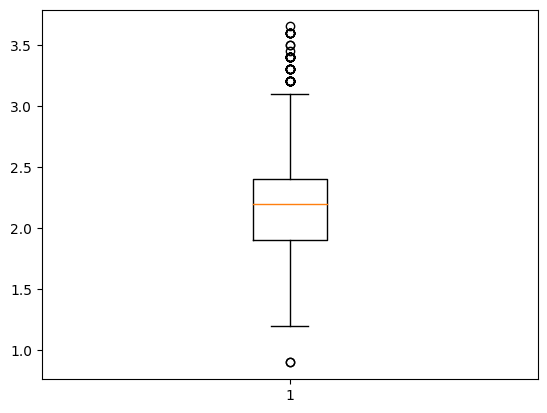

In [16]:
q3 = data['residual sugar'].quantile(0.75)
q1 = data['residual sugar'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['residual sugar'] = np.where(data['residual sugar'] > r,data['residual sugar'].median(),data['residual sugar'])
plt.boxplot(data['residual sugar'])
plt.show()

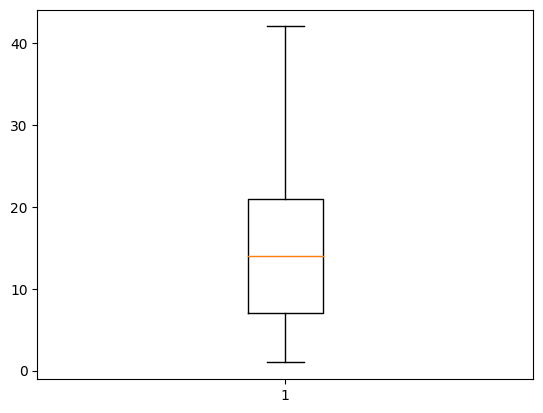

In [17]:
q3 = data['free sulfur dioxide'].quantile(0.75)
q1 = data['free sulfur dioxide'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['free sulfur dioxide'] = np.where(data['free sulfur dioxide'] > r,data['free sulfur dioxide'].median(),data['free sulfur dioxide'])
plt.boxplot(data['free sulfur dioxide'])
plt.show()

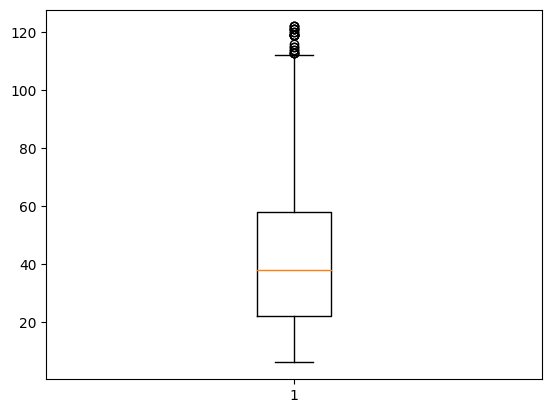

In [18]:
q3 = data['total sulfur dioxide'].quantile(0.75)
q1 = data['total sulfur dioxide'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['total sulfur dioxide'] = np.where(data['total sulfur dioxide'] > r,data['total sulfur dioxide'].median(),data['total sulfur dioxide'])
plt.boxplot(data['total sulfur dioxide'])
plt.show()

<ipython-input-19-2eb815ec6029>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

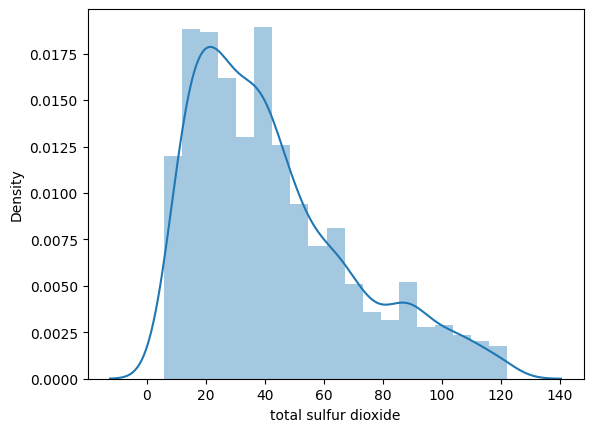

In [19]:
sns.distplot(data['total sulfur dioxide'])

<ipython-input-20-9ce672aee668>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

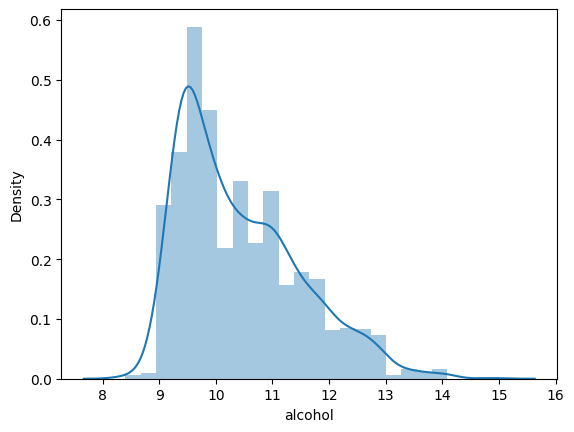

In [20]:
sns.distplot(data['alcohol'])

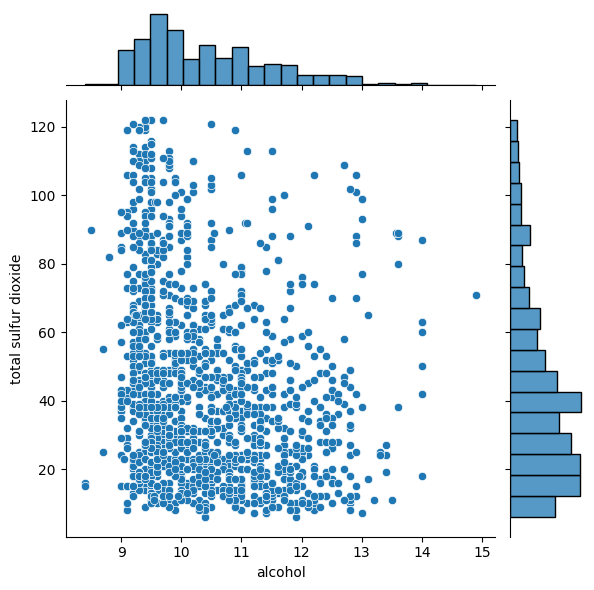

In [21]:
sns.jointplot(data=data,x=data['alcohol'],y=data['total sulfur dioxide'])

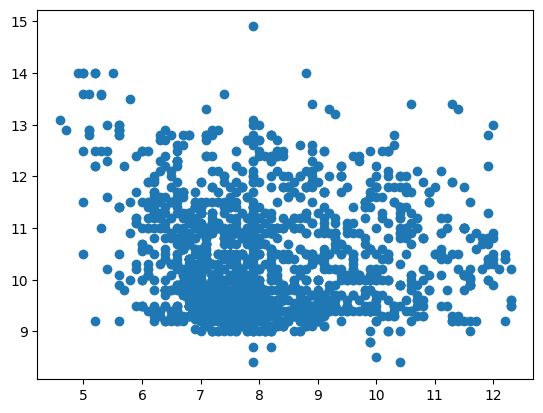

In [22]:
plt.scatter(data['fixed acidity'],data['alcohol'])
plt.show()

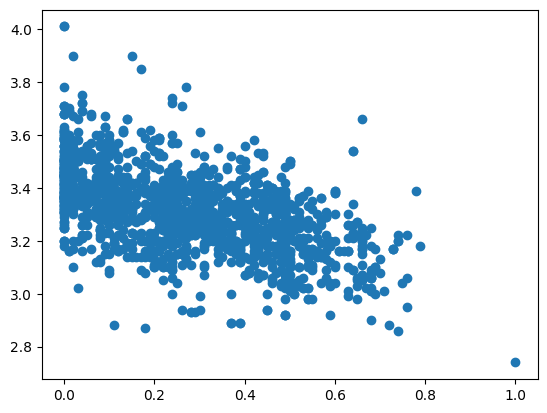

In [23]:
plt.scatter(data['citric acid'],data['pH'])
plt.show()

In [24]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.258476     0.607675   
volatile acidity          -0.258476          1.000000    -0.561786   
citric acid                0.607675         -0.561786     1.000000   
residual sugar             0.225436          0.018550     0.162804   
chlorides                  0.117711          0.062153     0.203823   
free sulfur dioxide       -0.145813          0.004853    -0.056013   
total sulfur dioxide      -0.113789          0.090253    -0.008622   
density                    0.562149          0.038786     0.364947   
pH                        -0.623444          0.216055    -0.541904   
sulphates                  0.162965         -0.244424     0.312770   
alcohol                   -0.090271         -0.223765     0.109903   
quality                    0.109637         -0.356247     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.225436   0.117711            -0.145813   
volatile acidity            0.018550   0.062153             0.004853   
citric acid                 0.162804   0.203823            -0.056013   
residual sugar              1.000000   0.025019             0.040756   
chlorides                   0.025019   1.000000            -0.041814   
free sulfur dioxide         0.040756  -0.041814             1.000000   
total sulfur dioxide        0.126300   0.058148             0.596640   
density                     0.373557   0.200632            -0.068194   
pH                         -0.072613  -0.265026             0.076710   
sulphates                   0.014246   0.371260             0.049022   
alcohol                     0.067645  -0.221141            -0.053316   
quality                     0.035506  -0.128907            -0.047187   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113789  0.562149 -0.623444   0.162965   
volatile acidity                  0.090253  0.038786  0.216055  -0.244424   
citric acid                      -0.008622  0.364947 -0.541904   0.312770   
residual sugar                    0.126300  0.373557 -0.072613   0.014246   
chlorides                         0.058148  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.596640 -0.068194  0.076710   0.049022   
total sulfur dioxide              1.000000  0.083695  0.000408   0.014778   
density                           0.083695  1.000000 -0.341699   0.148506   
pH                                0.000408 -0.341699  1.000000  -0.196648   
sulphates                         0.014778  0.148506 -0.196648   1.000000   
alcohol                          -0.201234 -0.496180  0.205633   0.093595   
quality                          -0.168010 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.090271  0.109637  
volatile acidity     -0.223765 -0.356247  
citric acid           0.109903  0.226373  
residual sugar        0.067645  0.035506  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.053316 -0.047187  
total sulfur dioxide -0.201234 -0.168010  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

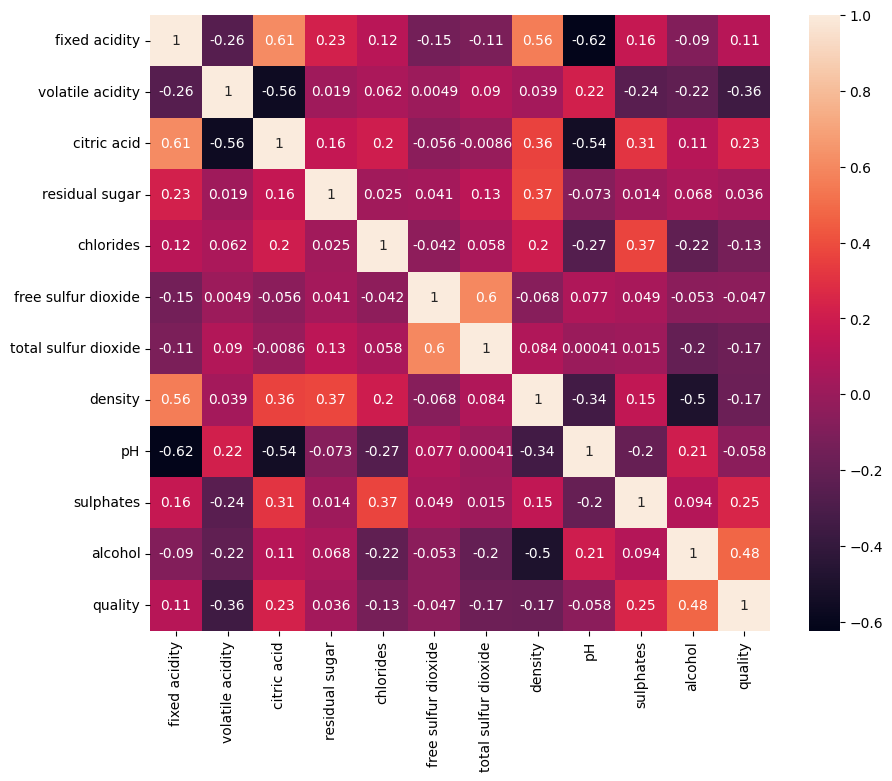

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,)

In [26]:
data.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.109637
residual sugar          0.035506
free sulfur dioxide    -0.047187
pH                     -0.057731
chlorides              -0.128907
total sulfur dioxide   -0.168010
density                -0.174919
volatile acidity       -0.356247
Name: quality, dtype: float64

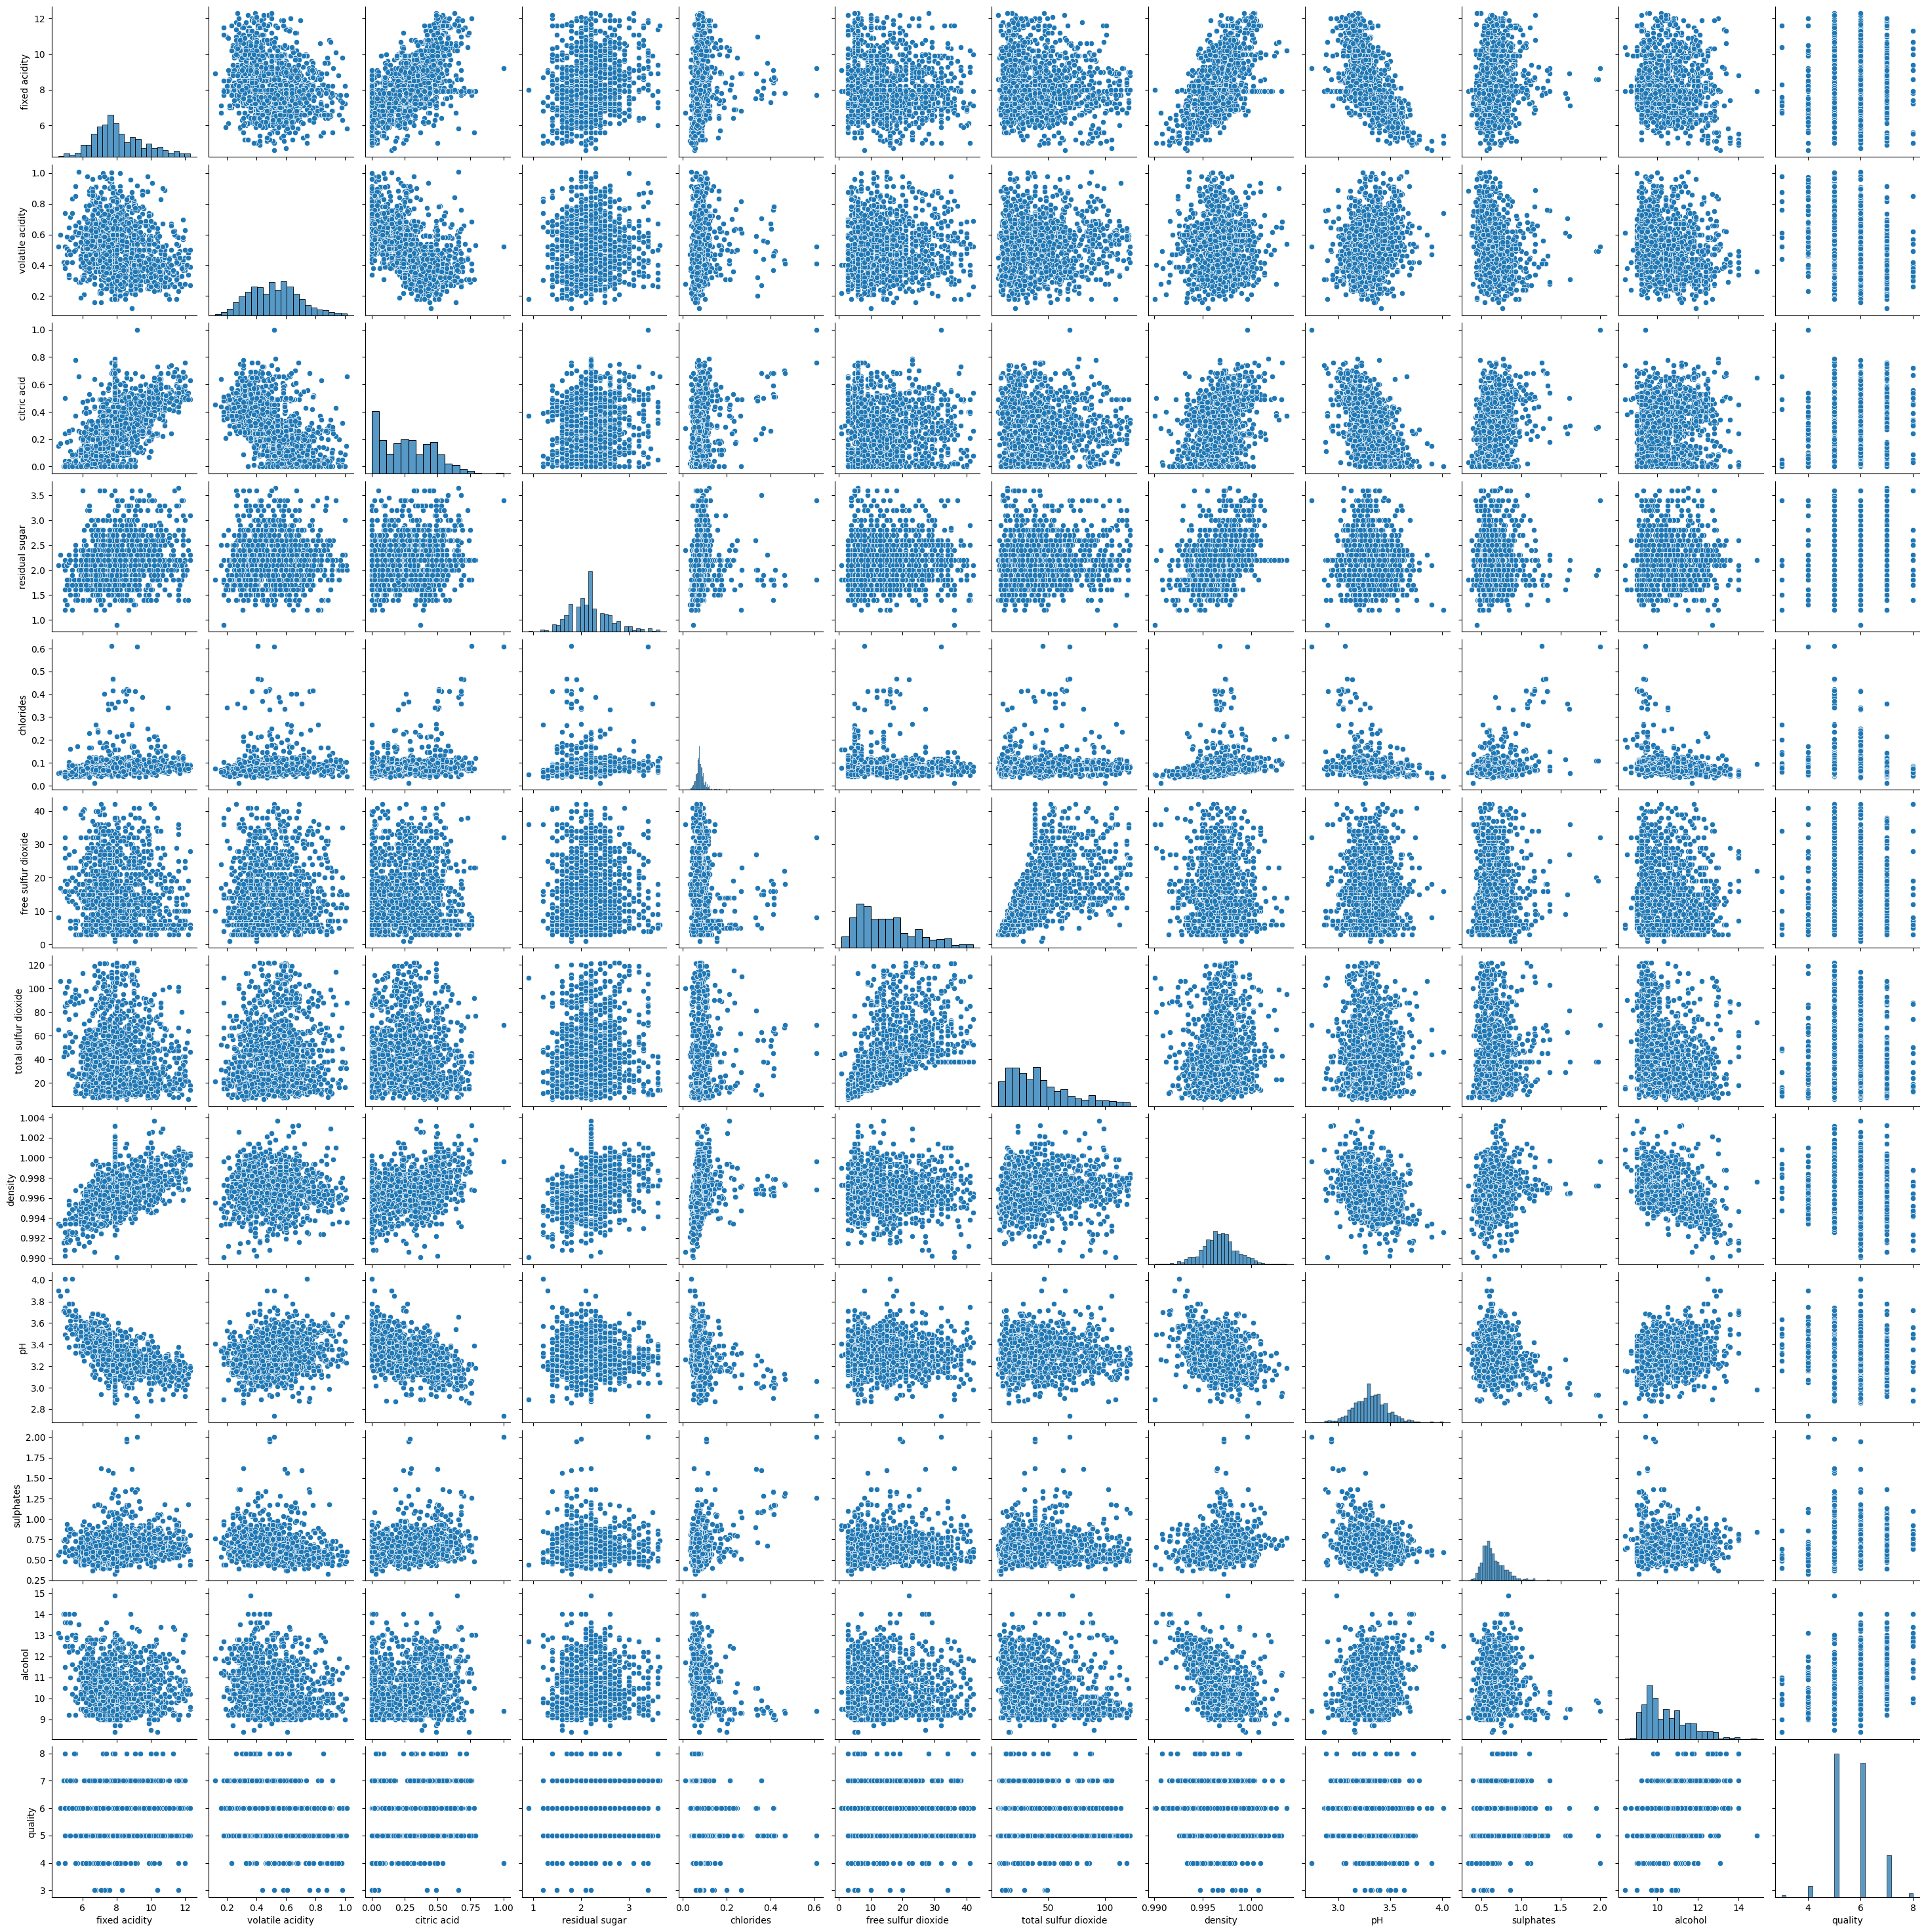

In [27]:
sns.pairplot(data)

In [28]:
x = data.drop(columns=['quality'],axis=1)

In [29]:
y = data['quality']

In [30]:
scale = MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.363636          0.651685         0.00        0.363636   0.106845   
1       0.415584          0.853933         0.00        0.618182   0.143573   
2       0.415584          0.719101         0.04        0.509091   0.133556   
3       0.857143          0.179775         0.56        0.363636   0.105175   
4       0.363636          0.651685         0.00        0.363636   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.243902              0.241379  0.567548  0.606299   0.137725   
1             0.585366              0.525862  0.494126  0.362205   0.209581   
2             0.341463              0.413793  0.508811  0.409449   0.191617   
3             0.390244              0.465517  0.582232  0.330709   0.149701   
4             0.243902              0.241379  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
4  0.153846

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [32]:
x_train.shape

(1279, 11)

In [33]:
x_test.shape

(320, 11)

#Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred1 = model1.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
print(accuracy_score(y_test,pred1))

0.609375


In [39]:
pd.crosstab(y_test,pred1)

col_0      5   6   7
quality             
3          2   0   0
4          7   4   0
5        105  30   0
6         48  84  10
7          2  19   6
8          0   1   2

In [40]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.78      0.70       135
           6       0.61      0.59      0.60       142
           7       0.33      0.22      0.27        27
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.26      0.27      0.26       320
weighted avg       0.57      0.61      0.59       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
pred1_train = model1.predict(x_train)
accuracy_score(y_train,pred1_train)

0.5785770132916341

#Random Value Logistic Regression

In [42]:
x_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1109       0.805195          0.393258         0.43        0.436364   0.265442   
1032       0.454545          0.786517         0.00        0.472727   0.138564   
1002       0.584416          0.191011         0.33        0.418182   0.085142   
487        0.727273          0.589888         0.36        0.327273   0.068447   
979        0.987013          0.370787         0.49        0.181818   0.105175   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1109             0.634146              0.517241  0.596916  0.338583   
1032             0.097561              0.068966  0.621880  0.488189   
1002             0.292683              0.181034  0.373715  0.409449   
487              0.097561              0.068966  0.596916  0.338583   
979              0.048780              0.000000  0.501468  0.307087   

      sulphates   alcohol  
1109   0.257485  0.369231  
1032   0.119760  0.184615  
1002   0.305389  0.507692  
487    0.053892  0.246154  
979    0.179641  0.307692

In [43]:
model1.predict([[0.548673,0.239726,0.43,0.082192,0.265442,0.634146,0.517241,0.596916,0.338583,0.257485,0.369231]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6])

#Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model2 = DecisionTreeClassifier()

In [46]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
pred2 = model2.predict(x_test)

In [48]:
accuracy_score(y_test,pred2)

0.63125

In [49]:
pd.crosstab(y_test,pred2)

col_0    3  4   5   6   7  8
quality                     
3        0  0   0   2   0  0
4        0  1   2   8   0  0
5        1  4  94  34   2  0
6        1  2  33  92  12  2
7        0  0   3   6  15  3
8        0  0   0   1   2  0

In [50]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.09      0.11        11
           5       0.71      0.70      0.70       135
           6       0.64      0.65      0.65       142
           7       0.48      0.56      0.52        27
           8       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.63      0.63       320



In [51]:
pred2_train = model2.predict(x_train)

In [52]:
accuracy_score(y_train,pred2_train)

1.0

#Random Value Decision Tree

In [53]:
model1.predict([[0.548673,0.239726,0.43,0.082192,0.265442,0.634146,0.517241,0.596916,0.338583,0.257485,0.369231]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6])

#Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model3 = RandomForestClassifier()

In [64]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
pred3 = model3.predict(x_test)

In [66]:
accuracy_score(y_test,pred3)

0.7375

In [67]:
pd.crosstab(y_test,pred3)

col_0      5    6   7  8
quality                 
3          2    0   0  0
4          8    3   0  0
5        112   22   1  0
6         25  109   8  0
7          1    9  15  2
8          0    1   2  0

In [69]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.83      0.79       135
           6       0.76      0.77      0.76       142
           7       0.58      0.56      0.57        27
           8       0.00      0.00      0.00         3

    accuracy                           0.74       320
   macro avg       0.35      0.36      0.35       320
weighted avg       0.70      0.74      0.72       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
pred3_train = model3.predict(x_train)
accuracy_score(y_train,pred3_train)

1.0

#Random Value Random Forest

In [71]:
model1.predict([[0.548673,0.239726,0.43,0.082192,0.265442,0.634146,0.517241,0.596916,0.338583,0.257485,0.369231]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6])